In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [18]:
with open("./cubic500Mwith50MbpsLinks.txt") as f:
    data = f.readlines()
    data = [x.strip() for x in data]
data

['Connecting to host 10.0.0.7, port 1212',
 '[  5] local 10.0.0.1 port 56858 connected to 10.0.0.7 port 1212',
 '[ ID] Interval           Transfer     Bitrate         Retr  Cwnd',
 '[  5]   0.00-0.10   sec  5.95 MBytes   495 Mbits/sec    0   91.9 KBytes',
 '[  5]   0.10-0.20   sec  6.00 MBytes   505 Mbits/sec    0   91.9 KBytes',
 '[  5]   0.20-0.30   sec  5.88 MBytes   494 Mbits/sec    0    136 KBytes',
 '[  5]   0.30-0.40   sec  6.12 MBytes   513 Mbits/sec    0    136 KBytes',
 '[  5]   0.40-0.51   sec  5.75 MBytes   455 Mbits/sec    0    157 KBytes',
 '[  5]   0.51-0.60   sec  6.12 MBytes   546 Mbits/sec    0    267 KBytes',
 '[  5]   0.60-0.70   sec  5.88 MBytes   494 Mbits/sec    0    294 KBytes',
 '[  5]   0.70-0.80   sec  6.00 MBytes   503 Mbits/sec    0    294 KBytes',
 '[  5]   0.80-0.90   sec  6.00 MBytes   501 Mbits/sec    0    294 KBytes',
 '[  5]   0.90-1.00   sec  5.88 MBytes   475 Mbits/sec    0    314 KBytes',
 '[  5]   1.00-1.10   sec  6.00 MBytes   523 Mbits/sec    0 

In [19]:
data = data[3:-6]
len(data), data

(300,
 ['[  5]   0.00-0.10   sec  5.95 MBytes   495 Mbits/sec    0   91.9 KBytes',
  '[  5]   0.10-0.20   sec  6.00 MBytes   505 Mbits/sec    0   91.9 KBytes',
  '[  5]   0.20-0.30   sec  5.88 MBytes   494 Mbits/sec    0    136 KBytes',
  '[  5]   0.30-0.40   sec  6.12 MBytes   513 Mbits/sec    0    136 KBytes',
  '[  5]   0.40-0.51   sec  5.75 MBytes   455 Mbits/sec    0    157 KBytes',
  '[  5]   0.51-0.60   sec  6.12 MBytes   546 Mbits/sec    0    267 KBytes',
  '[  5]   0.60-0.70   sec  5.88 MBytes   494 Mbits/sec    0    294 KBytes',
  '[  5]   0.70-0.80   sec  6.00 MBytes   503 Mbits/sec    0    294 KBytes',
  '[  5]   0.80-0.90   sec  6.00 MBytes   501 Mbits/sec    0    294 KBytes',
  '[  5]   0.90-1.00   sec  5.88 MBytes   475 Mbits/sec    0    314 KBytes',
  '[  5]   1.00-1.10   sec  6.00 MBytes   523 Mbits/sec    0    329 KBytes',
  '[  5]   1.10-1.20   sec  6.00 MBytes   507 Mbits/sec    0    329 KBytes',
  '[  5]   1.20-1.30   sec  5.88 MBytes   491 Mbits/sec    0    329 KB

In [26]:
data[0].split()

['[',
 '5]',
 '0.00-0.10',
 'sec',
 '5.95',
 'MBytes',
 '495',
 'Mbits/sec',
 '0',
 '91.9',
 'KBytes']

In [34]:
timelines = [data[i].split()[2] for i in range(len(data))]
cwnds = [float(data[i].split()[-2]) for i in range(len(data))]
timelines, cwnds

(['0.00-0.10',
  '0.10-0.20',
  '0.20-0.30',
  '0.30-0.40',
  '0.40-0.51',
  '0.51-0.60',
  '0.60-0.70',
  '0.70-0.80',
  '0.80-0.90',
  '0.90-1.00',
  '1.00-1.10',
  '1.10-1.20',
  '1.20-1.30',
  '1.30-1.40',
  '1.40-1.50',
  '1.50-1.60',
  '1.60-1.70',
  '1.70-1.80',
  '1.80-1.90',
  '1.90-2.00',
  '2.00-2.10',
  '2.10-2.20',
  '2.20-2.30',
  '2.30-2.40',
  '2.40-2.50',
  '2.50-2.60',
  '2.60-2.70',
  '2.70-2.80',
  '2.80-2.90',
  '2.90-3.00',
  '3.00-3.10',
  '3.10-3.20',
  '3.20-3.30',
  '3.30-3.40',
  '3.40-3.50',
  '3.50-3.60',
  '3.60-3.70',
  '3.70-3.80',
  '3.80-3.90',
  '3.90-4.00',
  '4.00-4.10',
  '4.10-4.20',
  '4.20-4.30',
  '4.30-4.40',
  '4.40-4.50',
  '4.50-4.60',
  '4.60-4.70',
  '4.70-4.80',
  '4.80-4.90',
  '4.90-5.00',
  '5.00-5.10',
  '5.10-5.20',
  '5.20-5.30',
  '5.30-5.40',
  '5.40-5.50',
  '5.50-5.60',
  '5.60-5.70',
  '5.70-5.80',
  '5.80-5.90',
  '5.90-6.00',
  '6.00-6.10',
  '6.10-6.20',
  '6.20-6.30',
  '6.30-6.40',
  '6.40-6.50',
  '6.50-6.60',
  '6.60-6.

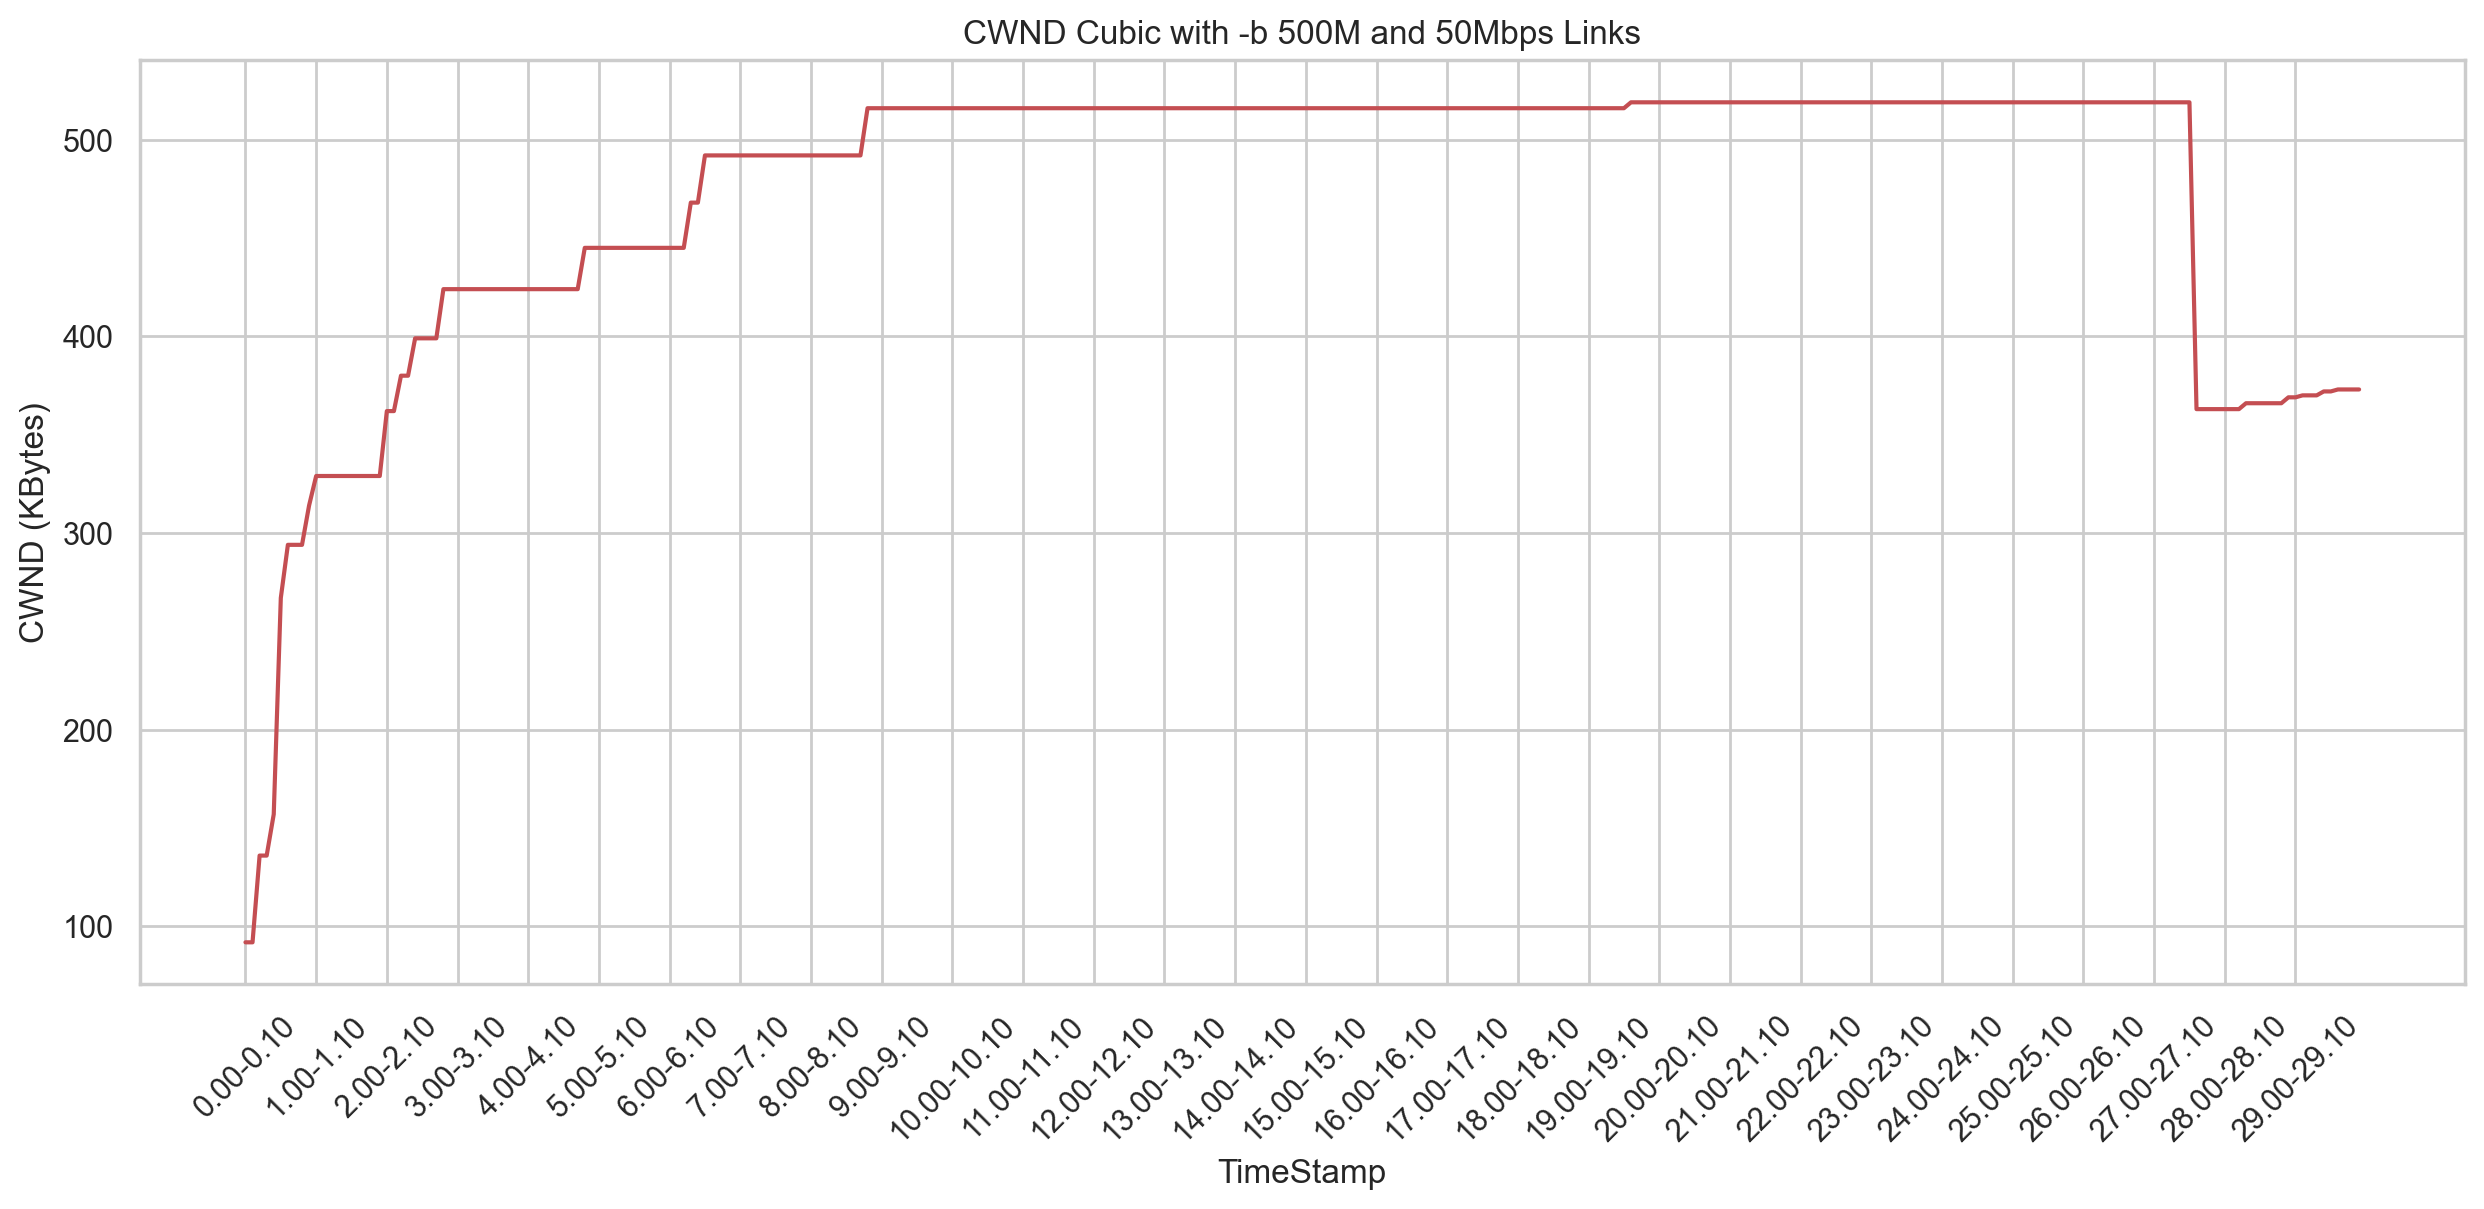

In [43]:
# seaborn timeseries plot of timelines with cwnds

sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))
plt.plot(np.arange(0, len(cwnds)), cwnds, color="r")
plt.xticks(np.arange(0, len(timelines), step=10), timelines[::10], rotation=45)
plt.xlabel("TimeStamp")
plt.ylabel("CWND (KBytes)")
plt.title("CWND Cubic with -b 500M and 50Mbps Links")
plt.show()